## import libraries

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px

## Explore the data

In [9]:
path = 'logistic_regression_dataset.csv'
df = pd.read_csv(path)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0


In [10]:
df.shape

(4238, 17)

## Drop unneccesary features

In [11]:
df = df.drop(['education', 'id'], axis=1)
df.head(3)

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0


## Check null values

In [12]:
df.isnull().sum()

age                  0
sex                  0
is_smoking           0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD         848
dtype: int64

## Fill-up the nan data-points

In [13]:
num = df.select_dtypes('number')
for i in df.columns:
    if i in num.columns:
        df[i] = df[i].fillna(df[i].mean())
    else:
        df[i].fillna(df[i].mode()[0]) 

df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Data Visualization

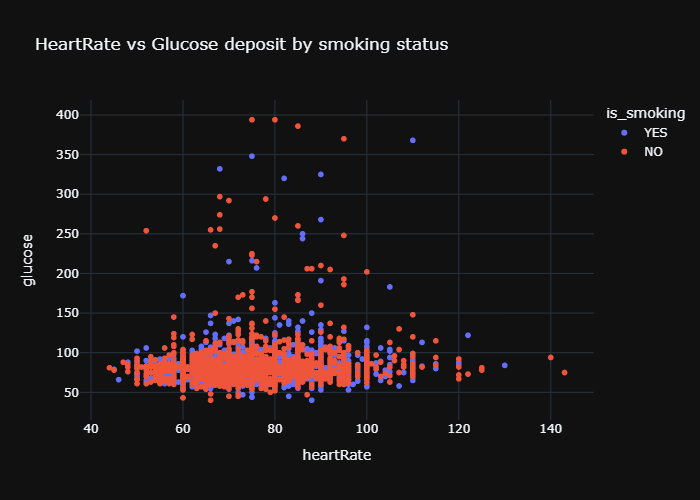

In [15]:
fig = px.scatter(df, x='heartRate', y='glucose', template='plotly_dark', color='is_smoking', title='HeartRate vs Glucose deposit by smoking status')
fig.show(renderer='png')

In [16]:
df2 = df.groupby('is_smoking')['age'].mean().reset_index()
df2

,is_smoking,age
0,NO,51.395522
1,YES,47.731137


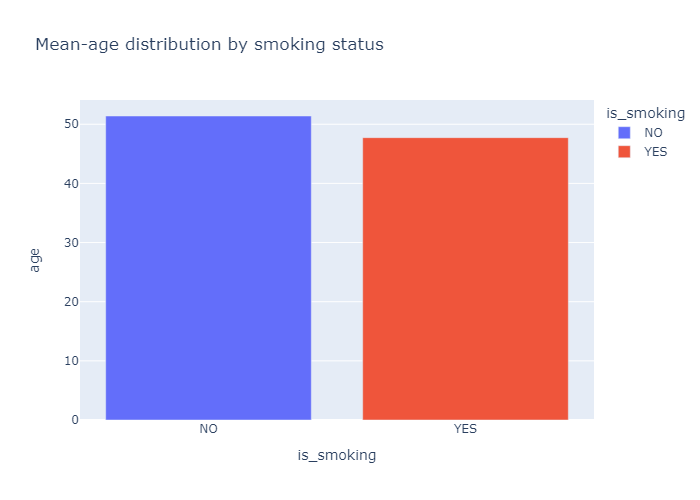

In [17]:
fig = px.bar(df2, x='is_smoking', y='age', color='is_smoking', title='Mean-age distribution by smoking status')
fig.show(renderer='png')

In [18]:
df['diabetes'] = df['diabetes'].map({1:'yes', 0:'No'})

In [19]:
df1 = df.groupby('diabetes')['heartRate'].mean().reset_index()
df1

,diabetes,heartRate
0,No,75.783211
1,yes,79.504587


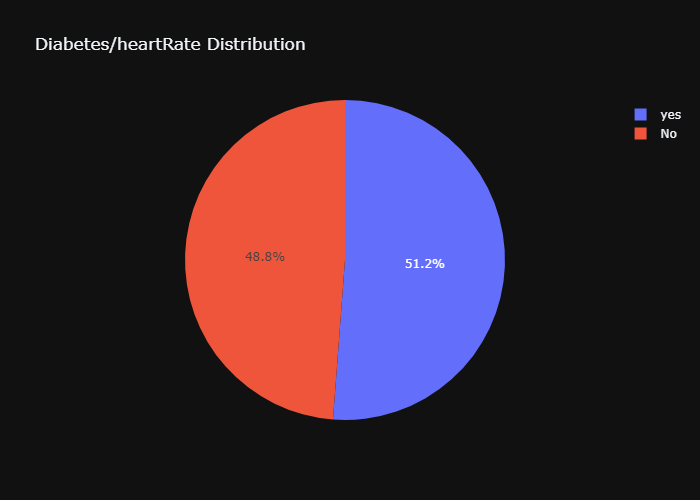

In [22]:
fig = px.pie(df1, names='diabetes', values='heartRate', template='plotly_dark', title='Diabetes/heartRate Distribution')
fig.show(renderer='png')

In [23]:
df2 = df.groupby('diabetes')['sex'].value_counts().reset_index()
df2.tail(3)

,diabetes,sex,count
1,No,M,1767
2,yes,F,57
3,yes,M,52


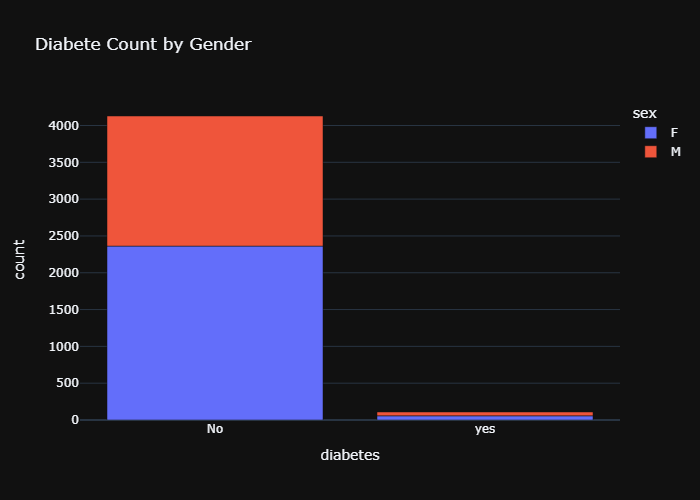

In [24]:
fig = px.bar(df2, x='diabetes', y='count', color='sex', template='plotly_dark', title='Diabete Count by Gender')
fig.show(renderer='png')

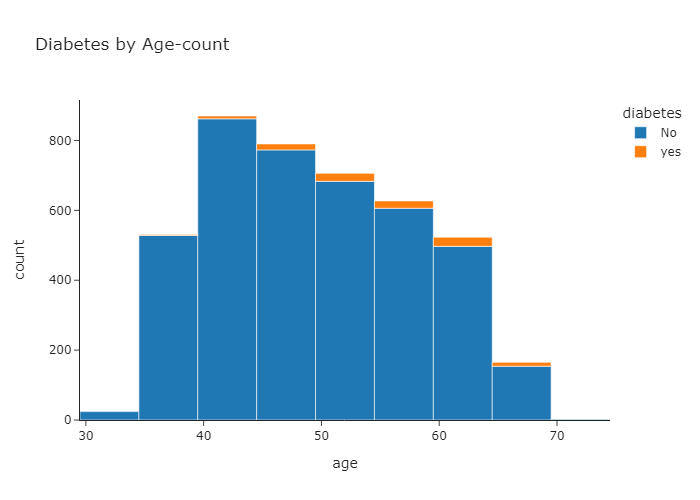

In [25]:
fig = px.histogram(df, x='age', nbins=15, color='diabetes', template='simple_white', title='Diabetes by Age-count')
fig.show(renderer='png')

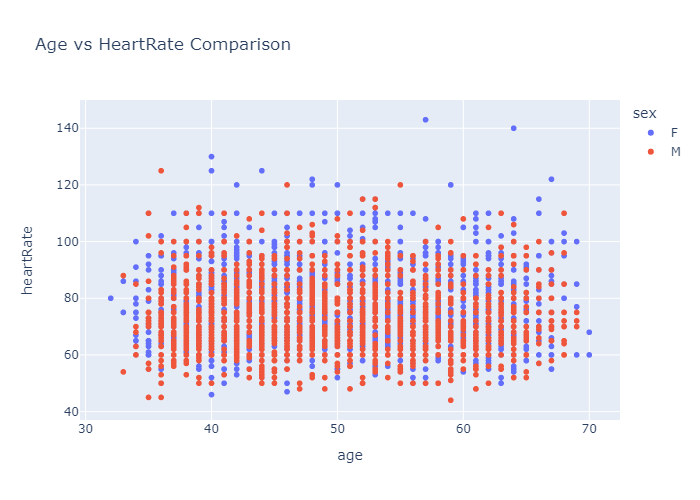

In [27]:
fig = px.scatter(df, x='age', y='heartRate', color='sex', title='Age vs HeartRate Comparison')
fig.show(renderer='png')


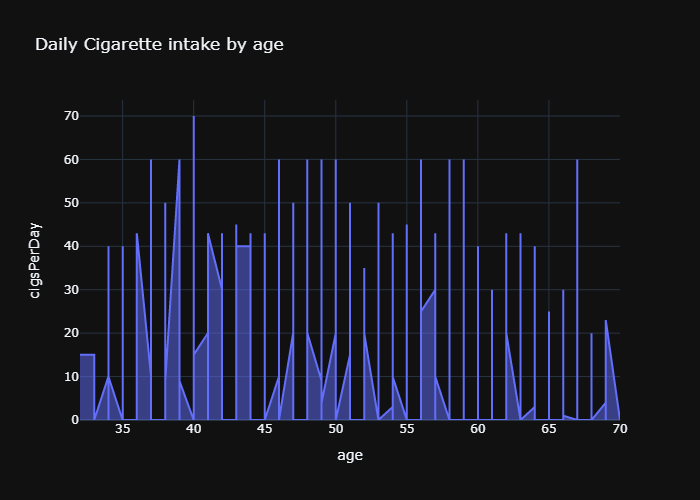

In [28]:
fig = px.area(df, x='age', y='cigsPerDay', template='plotly_dark', title='Daily Cigarette intake by age')
fig.show(renderer='png')

In [29]:
df['TenYearCHD'] = df['TenYearCHD'].map({0:'No', 1:'Yes'})

In [30]:
df2 = df['TenYearCHD'].value_counts().reset_index()
df2

,TenYearCHD,count
0,No,2879
1,Yes,511


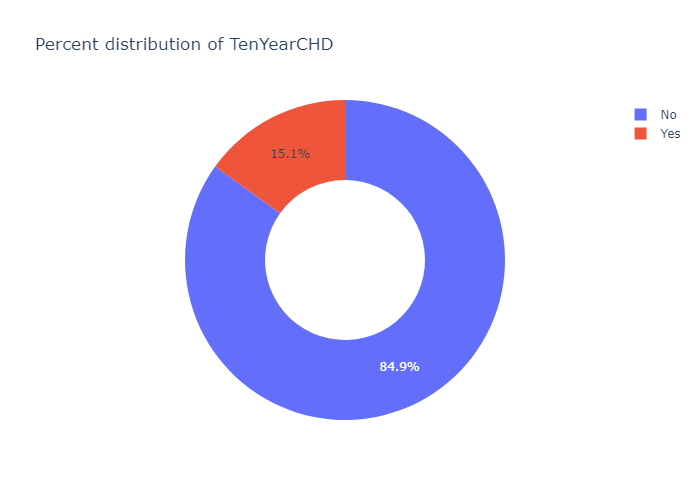

In [31]:
fig = px.pie(df2, names='TenYearCHD', values='count', hole=0.5, title='Percent distribution of TenYearCHD')
fig.show(renderer='png')

In [32]:
nums = df.select_dtypes('number')
z = nums.corr()
z.head(3)

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
age,1.000000,-0.192366,0.121980,0.057655,0.307194,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850
cigsPerDay,-0.192366,1.000000,-0.045826,-0.032706,-0.065947,-0.026025,-0.088505,-0.056391,-0.092453,0.074851,-0.056088
BPMeds,0.121980,-0.045826,1.000000,0.115003,0.259243,0.078909,0.252047,0.192490,0.099552,0.015175,0.048905


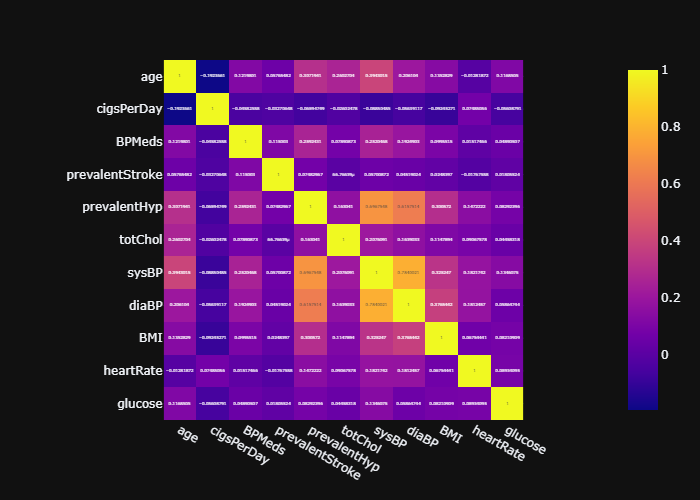

In [33]:
fig = px.imshow(z, text_auto=True, template='plotly_dark')
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

## feature transformation

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat = df.select_dtypes('object')
for i in df.columns:
    if i in cat.columns:
        df[i] = encoder.fit_transform(df[i])

df.tail()


,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,46,0,0,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.000000,0.150737
4234,58,0,0,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.000000,0.150737
4235,55,1,0,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,81.966753,0.150737
4236,45,0,0,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.000000,0.150737
4237,56,1,1,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.000000,0.150737


## convert the dataset from float to integer

In [62]:
df = df.astype('int')
df.tail()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,46,0,0,0,0,0,0,0,277,122,77,27,63,77,0
4234,58,0,0,0,0,0,0,0,190,132,67,23,65,70,0
4235,55,1,0,0,0,0,0,0,199,134,80,26,120,81,0
4236,45,0,0,0,0,0,1,0,231,157,104,22,75,92,0
4237,56,1,1,25,0,0,0,0,255,138,80,23,67,79,0


## split dataset into input(X) and output(y)

In [64]:
X = df.iloc[:, 0:14]
y = df.iloc[:, 14]

## Feature scaling using standard scalar

In [65]:
df.describe()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000
mean,49.584946,0.429212,0.494101,9.003067,0.029259,0.005899,0.310524,0.025720,236.713072,132.254837,82.812647,25.30840,75.878716,81.878244,0.120576
std,8.572160,0.495022,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326521,22.041247,11.917477,4.07656,12.025185,22.838305,0.325672
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.000000,48.000000,15.00000,44.000000,40.000000,0.000000
25%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.00000,68.000000,72.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.00000,75.000000,80.000000,0.000000
75%,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.750000,28.00000,83.000000,85.000000,0.000000
max,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.000000,56.00000,143.000000,394.000000,1.000000


In [66]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X = scaler.fit_transform(X)
X


array([[ 1.07142857,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.92857143,  1.        ,  0.        , ...,  0.8       ,
        -0.2       , -0.38461538],
       [-0.21428571,  0.        ,  1.        , ..., -1.        ,
         0.86666667,  1.07692308],
       ...,
       [ 0.42857143,  1.        ,  0.        , ...,  0.2       ,
         3.        ,  0.07692308],
       [-0.28571429,  0.        ,  0.        , ..., -0.6       ,
         0.        ,  0.92307692],
       [ 0.5       ,  1.        ,  1.        , ..., -0.4       ,
        -0.53333333, -0.07692308]])

## split the dataset into training/testing set

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Train the model

In [68]:
# from sklearn.linear_model import LogisticRegression
# # instantiate the model
# model = LogisticRegression()
# # fit the model
# model = model.fit(X_train, y_train)


## Make prediction

In [69]:
prediction = model.predict(X_test)


## Evaluate the model

In [70]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, prediction) * 100
print(f"Accuracy score is: {accuracy}")

Accuracy score is: 88.67924528301887


## Save/Load the trained model

In [71]:
import joblib as joblib
from joblib import dump, load
model = joblib.dump(model, 'diagnosis.joblib')

In [72]:
model = joblib.load('diagnosis.joblib')
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,